# Get the data

In [1]:
import pandas as pd

housing = pd.read_csv("housing.csv") #(csv_path)

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
import numpy as np

np.random.seed(42)

def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data) * test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [7]:
train_set,test_set=split_train_test(housing,0.2)
print(len(train_set), "train +", len(test_set),"test")

16512 train + 4128 test


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29f1dd2e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f29ed029c88>]], dtype=object)

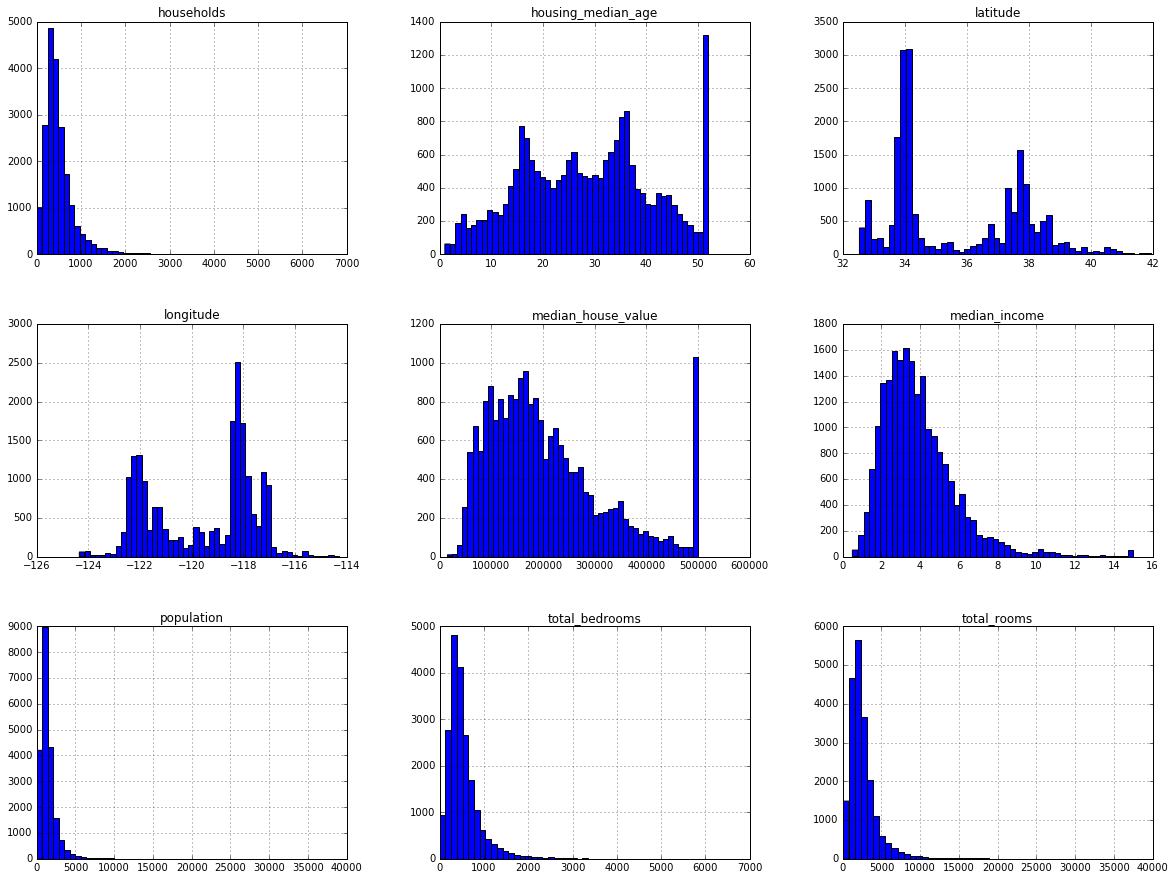

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

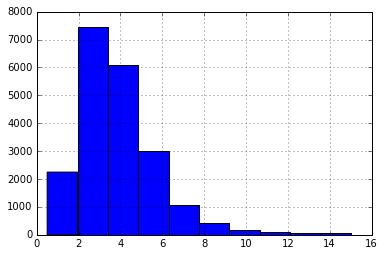

In [9]:
housing["median_income"].hist()

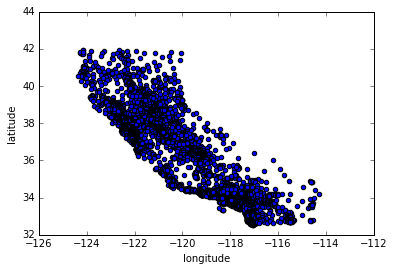

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [11]:
corr_matrix=housing.corr()

In [12]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29ec3e8fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f29ec750ac8>]], dtype=object)

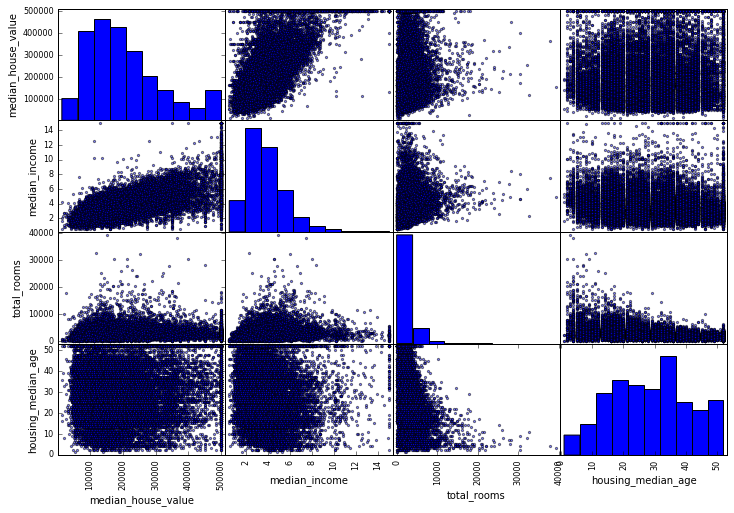

In [13]:
from pandas import scatter_matrix
attributes = ['median_house_value','median_income', 'total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["ocean_proximity"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [16]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17825,-121.88,37.40,9.0,6751.0,NaN,4240.0,1438.0,5.3400,<1H OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,NEAR OCEAN
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,NEAR OCEAN
10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,INLAND
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN


## Dealing with incomplete data options
1. Remove all the rows with blanks
2. Remove the column entirely
3. Fill with median value

In [17]:
sample_incomplete_rows.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17825,-121.88,37.40,9.0,6751.0,4240.0,1438.0,5.3400,<1H OCEAN
20268,-119.18,34.19,19.0,2393.0,1938.0,762.0,1.6953,NEAR OCEAN
2578,-124.06,40.86,34.0,4183.0,1891.0,669.0,3.2216,NEAR OCEAN
10033,-121.08,39.22,30.0,2188.0,1033.0,437.0,2.1419,INLAND
20484,-118.72,34.28,17.0,3051.0,1705.0,495.0,5.7376,<1H OCEAN


In [18]:
median = housing["total_bedrooms"].median() #calculate the median value
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17825,-121.88,37.40,9.0,6751.0,433.0,4240.0,1438.0,5.3400,<1H OCEAN
20268,-119.18,34.19,19.0,2393.0,433.0,1938.0,762.0,1.6953,NEAR OCEAN
2578,-124.06,40.86,34.0,4183.0,433.0,1891.0,669.0,3.2216,NEAR OCEAN
10033,-121.08,39.22,30.0,2188.0,433.0,1033.0,437.0,2.1419,INLAND
20484,-118.72,34.28,17.0,3051.0,433.0,1705.0,495.0,5.7376,<1H OCEAN


In [19]:
housing_num=housing.drop('ocean_proximity', axis=1)

In [20]:
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy='median')
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [21]:
imputer.statistics_

array([ -118.5   ,    34.26  ,    29.    ,  2115.    ,   433.    ,
        1161.    ,   409.    ,     3.5313])

In [22]:
housing_num.median().values

array([ -118.5   ,    34.26  ,    29.    ,  2115.    ,   433.    ,
        1161.    ,   409.    ,     3.5313])

In [23]:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=list(housing.index.values))

In [24]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17825,-121.88,37.40,9.0,6751.0,433.0,4240.0,1438.0,5.3400
20268,-119.18,34.19,19.0,2393.0,433.0,1938.0,762.0,1.6953
2578,-124.06,40.86,34.0,4183.0,433.0,1891.0,669.0,3.2216
10033,-121.08,39.22,30.0,2188.0,433.0,1033.0,437.0,2.1419
20484,-118.72,34.28,17.0,3051.0,433.0,1705.0,495.0,5.7376


In [25]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7309
INLAND        5241
NEAR OCEAN    2126
NEAR BAY      1832
ISLAND           4
Name: ocean_proximity, dtype: int64

In [26]:
housing_cat=housing['ocean_proximity']
housing_cat.head(10)

2271        INLAND
5039     <1H OCEAN
10341    <1H OCEAN
16325       INLAND
10209    <1H OCEAN
18756       INLAND
5226     <1H OCEAN
13042       INLAND
3021        INLAND
336       NEAR BAY
Name: ocean_proximity, dtype: object

In [27]:
housing_cat_encoded,housing_categories=housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 2])

In [28]:
y=pd.Series(housing_cat_encoded)

In [29]:
y.value_counts()

1    7309
0    5241
3    2126
2    1832
4       4
dtype: int64

### SkLearn One Hot Encoder

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [31]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

### Feature Scaling Pipeline


In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [38]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-119.8,36.78,43,2382,431,874,380,3.5542,INLAND,6.26842,2.3
1,-118.34,33.99,34,397,132,250,121,1.675,<1H OCEAN,3.28099,2.06612
2,-117.8,33.78,17,4138,805,2442,780,4.7804,<1H OCEAN,5.30513,3.13077
3,-121.33,37.98,10,1564,397,643,347,2.7031,INLAND,4.5072,1.85303
4,-117.92,33.88,32,1683,273,719,263,5.3649,<1H OCEAN,6.39924,2.73384


In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
5039,-118.34,33.99,34.0,397.0,132.0,250.0,121.0,1.6750,<1H OCEAN
10341,-117.80,33.78,17.0,4138.0,805.0,2442.0,780.0,4.7804,<1H OCEAN
16325,-121.33,37.98,10.0,1564.0,397.0,643.0,347.0,2.7031,INLAND
10209,-117.92,33.88,32.0,1683.0,273.0,719.0,263.0,5.3649,<1H OCEAN


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
    ])
housing_num_tr=num_pipeline.fit_transform(housing_num)